In [ ]:
%pip install pandas

In [12]:
import pandas as pd

# Carregando o conjunto de dados
df = pd.read_csv('Housing.csv')

# Visualizando as primeiras amostras do dfs
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df['mainroad'] = df['mainroad'].replace({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].replace({'yes': 1, 'no': 0})
df['basement'] = df['basement'].replace({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].replace({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].replace({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].replace({'yes': 1, 'no': 0})


In [ ]:
mapeamento = {'furnished': 1, 'semi-furnished': 2, 'unfurnished': 0}

# Use o método replace para substituir as palavras pelos números
df['furnishingstatus'] = df['furnishingstatus'].replace(mapeamento)

In [15]:
summary_stats = pd.DataFrame({
    # 'Coluna': df.columns,
    'Média': df.mean(),
    'Mediana': df.median(),
    'Desvio Padrão': df.std(),
    'Variação': df.var()
})

summary_stats

,Média,Mediana,Desvio Padrão,Variação
price,4.766729e+06,4340000.0,1.870440e+06,3.498544e+12
area,5.150541e+03,4600.0,2.170141e+03,4.709512e+06
bedrooms,2.965138e+00,3.0,7.380639e-01,5.447383e-01
bathrooms,1.286239e+00,1.0,5.024696e-01,2.524757e-01
stories,1.805505e+00,2.0,8.674925e-01,7.525432e-01
mainroad,8.587156e-01,1.0,3.486347e-01,1.215461e-01
guestroom,1.779817e-01,0.0,3.828487e-01,1.465731e-01
basement,3.504587e-01,0.0,4.775519e-01,2.280559e-01
hotwaterheating,4.587156e-02,0.0,2.093987e-01,4.384781e-02
airconditioning,3.155963e-01,0.0,4.651799e-01,2.163923e-01


In [16]:
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 1  
1                 1  
2                 2  
3                 1  
4                 1  


In [17]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

print("Matriz de Correlação:")
print(correlation_matrix)

Matriz de Correlação:
                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefar

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

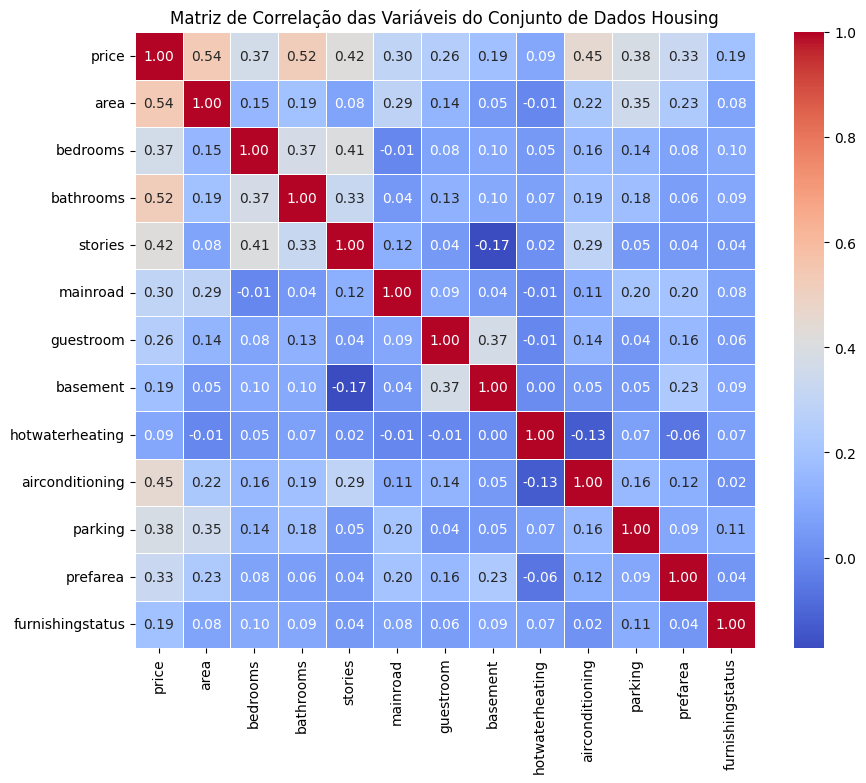

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis do Conjunto de Dados Housing')
plt.show()

In [21]:
# Medidas de tendência central
central_tendency = df.describe().loc[['mean', '50%']]

# Dispersão
dispersion = df.describe().loc[['std', 'min', 'max']]

print("Medidas de tendência central:")
print(central_tendency)
print("\nDispersão:")
print(dispersion)

Medidas de tendência central:
             price         area  bedrooms  bathrooms   stories  mainroad  \
mean  4.766729e+06  5150.541284  2.965138   1.286239  1.805505  0.858716   
50%   4.340000e+06  4600.000000  3.000000   1.000000  2.000000  1.000000   

      guestroom  basement  hotwaterheating  airconditioning   parking  \
mean   0.177982  0.350459         0.045872         0.315596  0.693578   
50%    0.000000  0.000000         0.000000         0.000000  0.000000   

      prefarea  furnishingstatus  
mean  0.234862          1.089908  
50%   0.000000          1.000000  

Dispersão:
            price          area  bedrooms  bathrooms   stories  mainroad  \
std  1.870440e+06   2170.141023  0.738064    0.50247  0.867492  0.348635   
min  1.750000e+06   1650.000000  1.000000    1.00000  1.000000  0.000000   
max  1.330000e+07  16200.000000  6.000000    4.00000  4.000000  1.000000   

     guestroom  basement  hotwaterheating  airconditioning   parking  \
std   0.382849  0.477552   

In [23]:
# Matriz de correlação
correlation_matrix = df.corr()

print("Matriz de correlação:")
print(correlation_matrix)

Matriz de correlação:
                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefar

In [25]:
# Normalização e discretização podem ser aplicadas dependendo da distribuição das variáveis
# Lidar com valores nulos
df.dropna(inplace=True)

ValueError: num must be an integer with 1 <= num <= 8, not 9

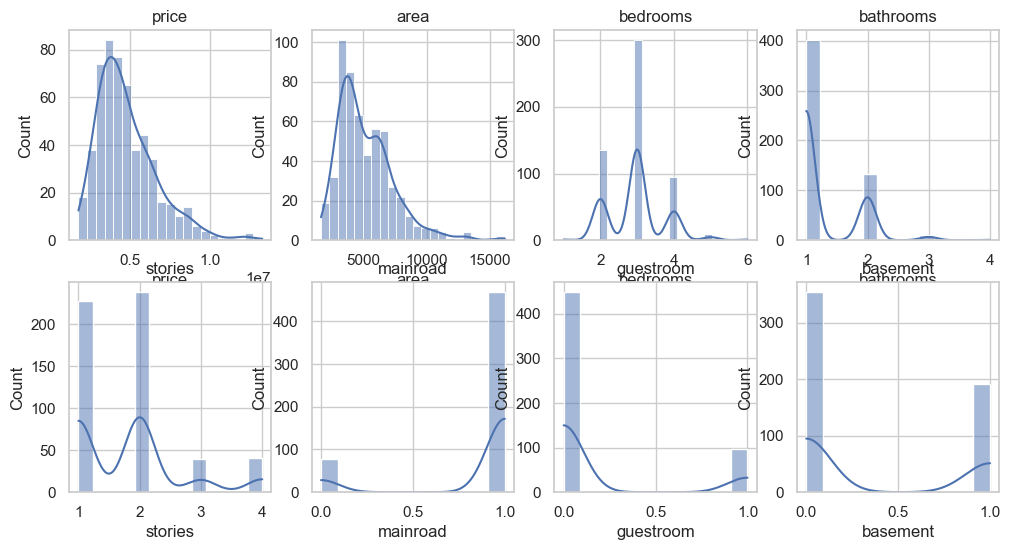

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações de visualização
sns.set(style="whitegrid")

# Histogramas
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Gráficos de dispersão
sns.pairplot(df)
plt.show()